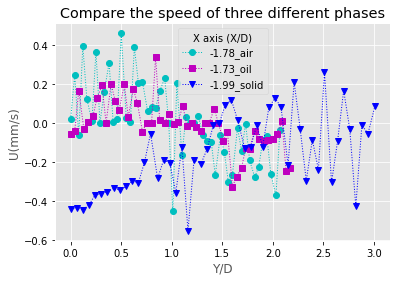

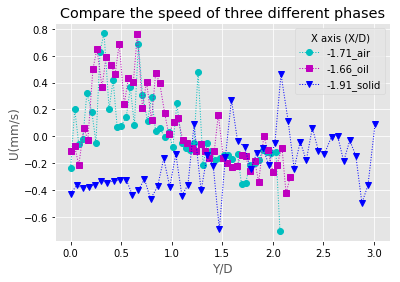

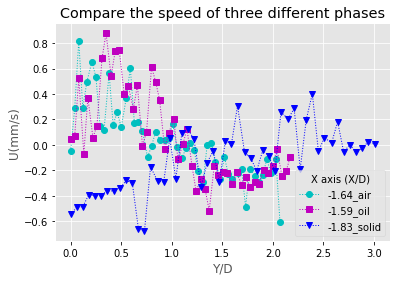

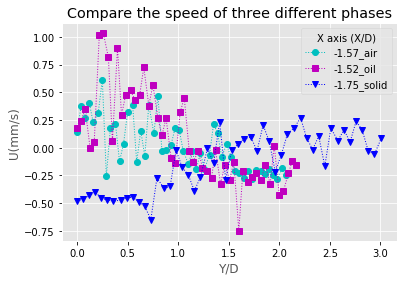

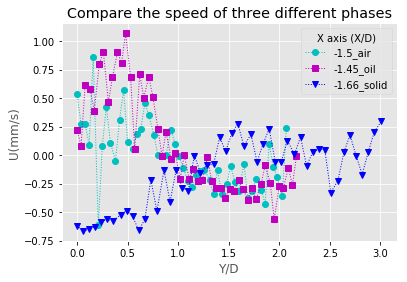

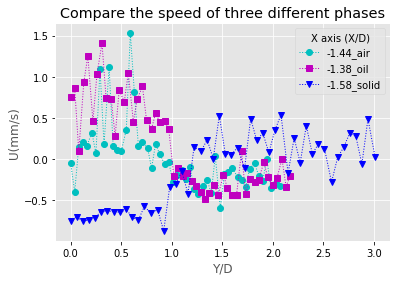

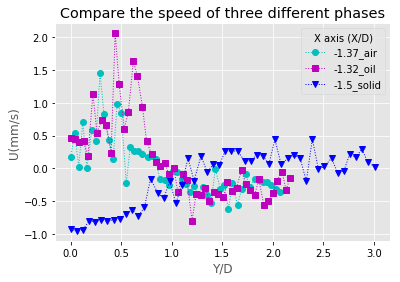

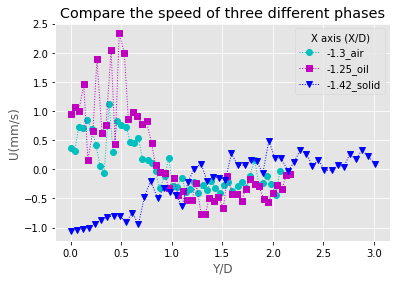

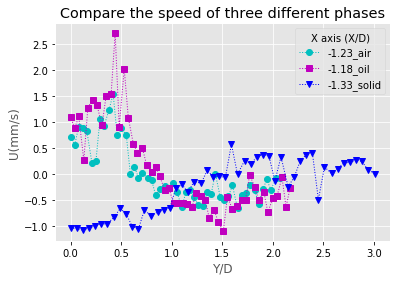

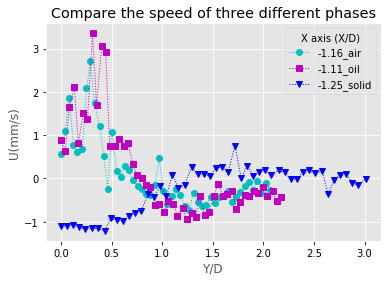

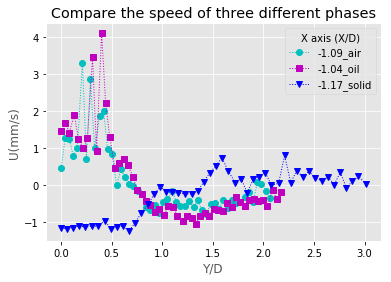

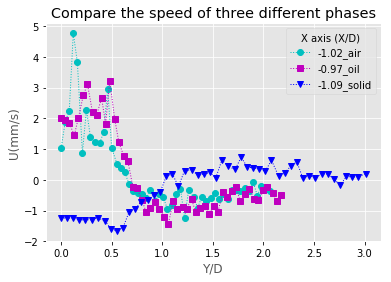

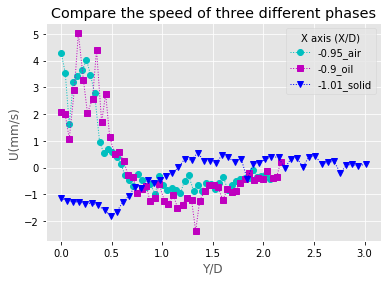

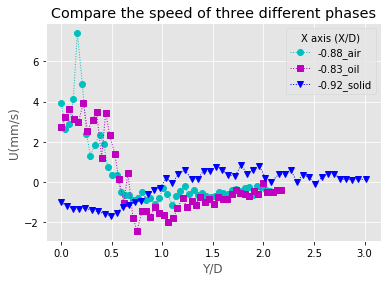

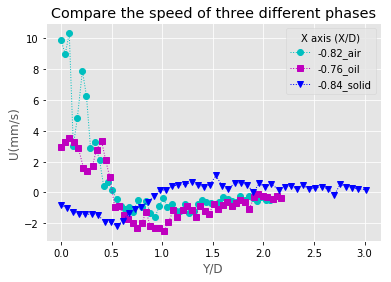

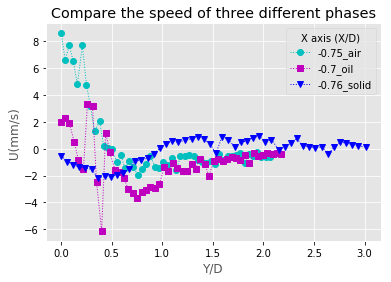

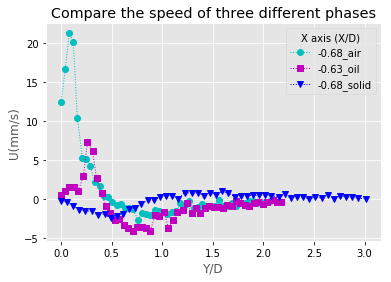

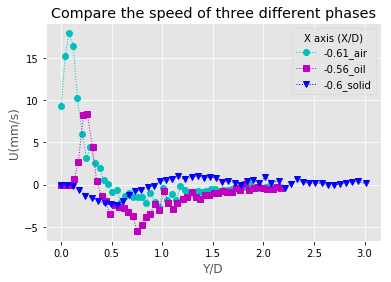

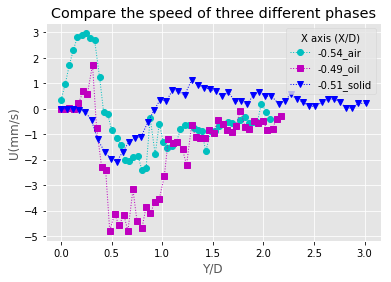

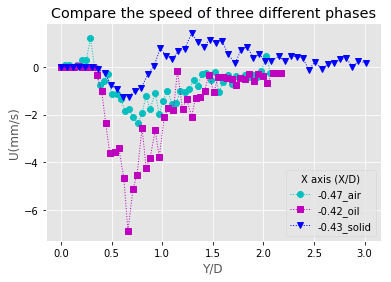

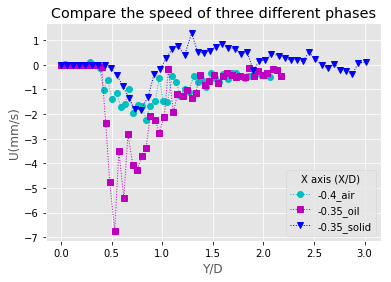

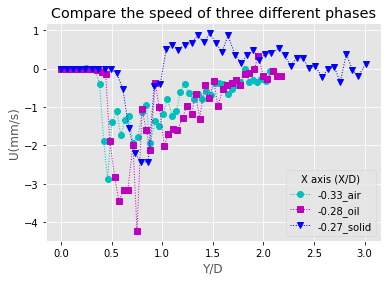

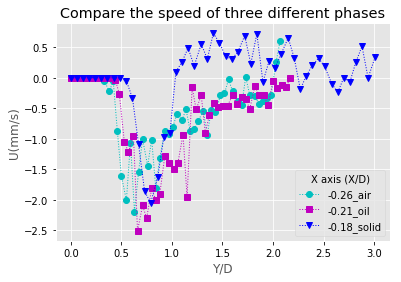

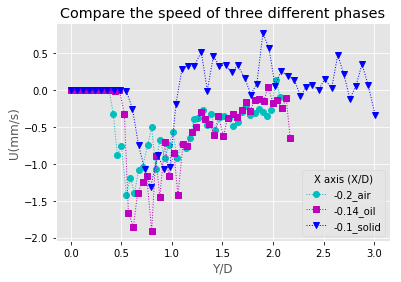

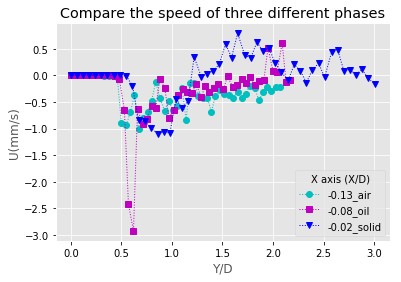

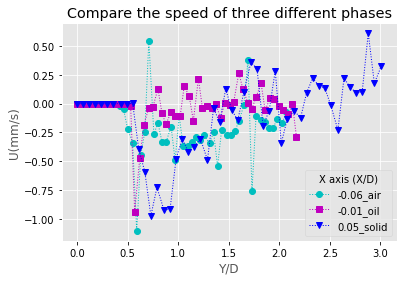

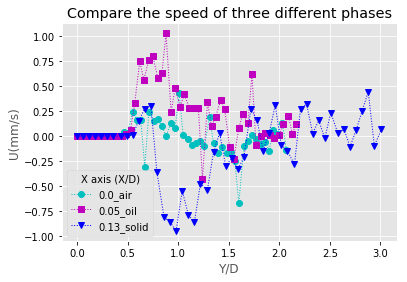

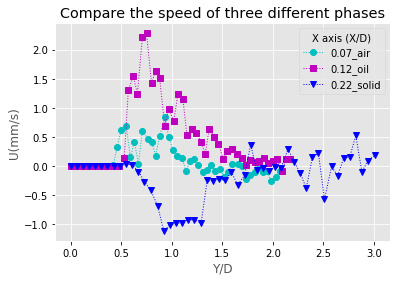

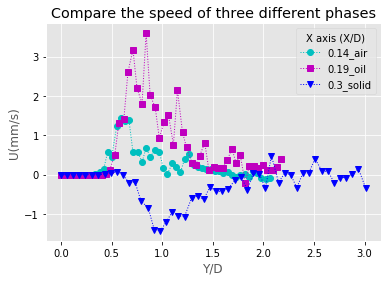

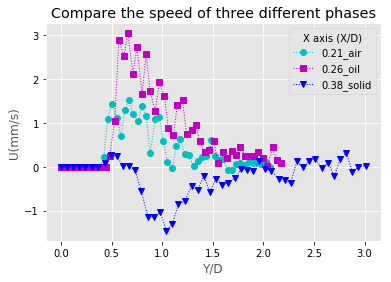

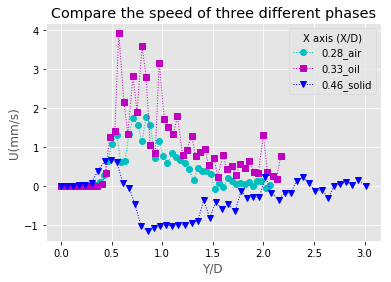

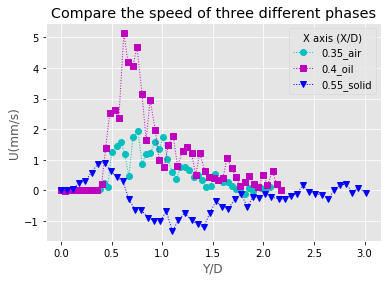

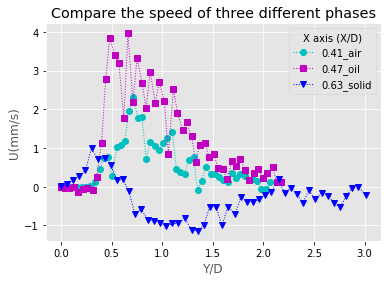

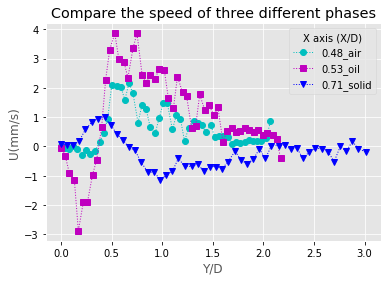

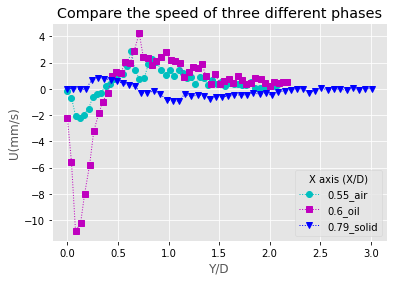

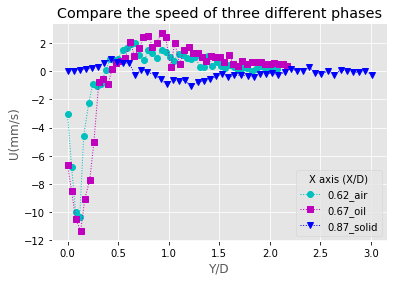

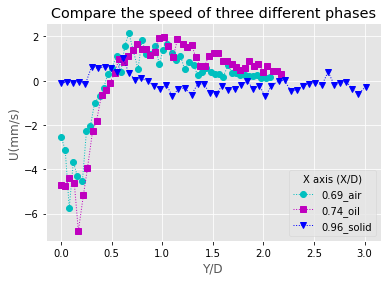

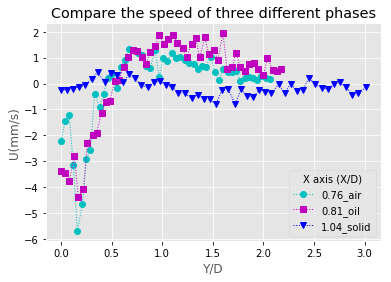

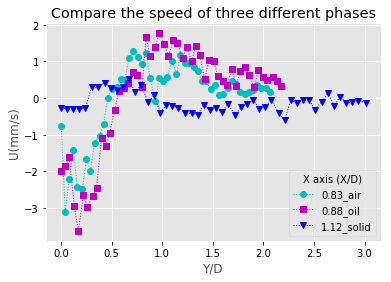

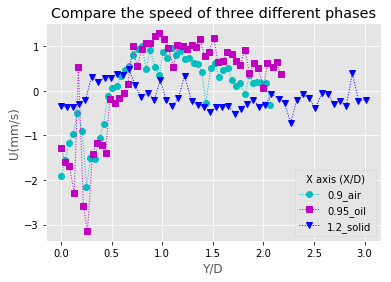

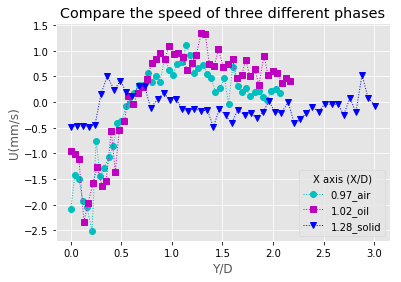

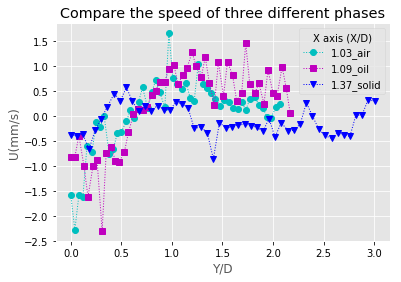

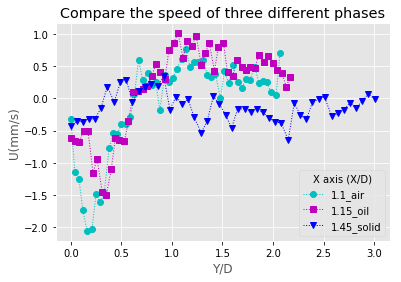

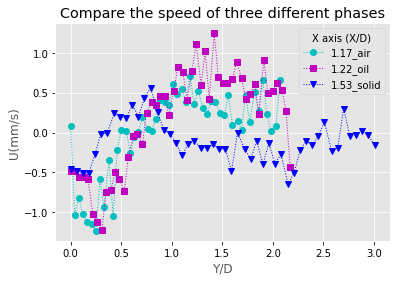

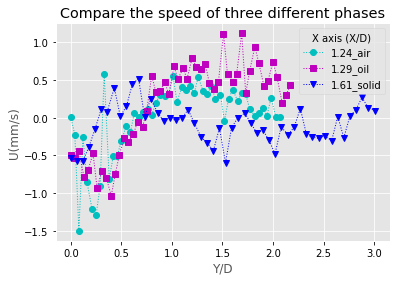

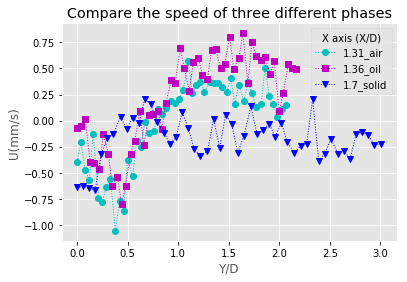

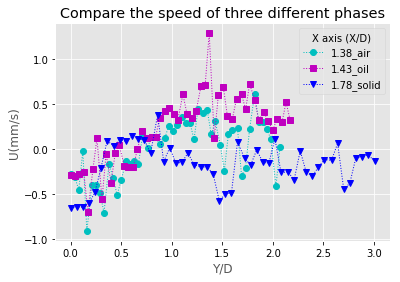

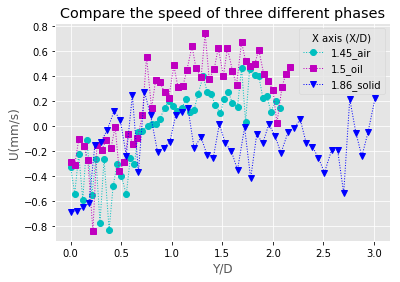

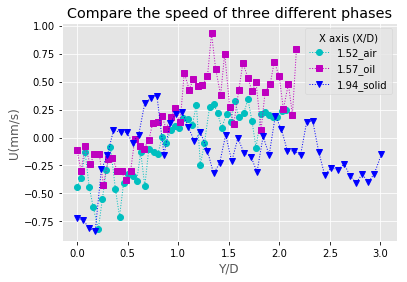

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def call_data(dataname):

    df=pd.read_csv(dataname)
    df=df.drop(0).dropna(axis=1)
    df["Y"]=df["Y"].astype(float)
    df["Y"]=(df["Y"]*100).astype(int).astype(float)/100
    df["X"]=df["X"].astype(float)
    df["X"]=(df["X"]*100).astype(int).astype(float)/100
    df=df.set_index('X',drop=1)
    return df
    
    
    
def show_data(data,start,end):
    plt.style.use('ggplot')
    fig,ax=plt.subplots()
    style=[':oc',':sm','v:b']
    strname=['air','oil','solid']
    for i in np.arange(start,end):
        for j,loc in enumerate(data):
            loc_index=loc.index.unique()
            plt.plot(loc[loc.index==loc_index[int(i)]]["Y"],loc[loc.index==loc_index[int(i)]]["U"],
                     style[j],lw=1,label=str(loc_index[int(i)])+'_'+strname[j])

    ax.legend(title="X axis (X/D)")
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.set_xlabel('Y/D')
    ax.set_ylabel('U(mm/s)')
    plt.title("Compare the speed of three different phases")
    ax.tick_params(colors="black")
    plt.show()


airdata=call_data('air.csv')
oildata=call_data('oil.csv')
soliddata=call_data('solid.csv')

for i in range(0,49):
    show_data([airdata,oildata,soliddata],i,i+1)


